<a href="https://colab.research.google.com/github/alanjones2/Alan-Jones-article-code/blob/master/sqlitepandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python pandas SQLite

In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

now get the data

1948 to 2018 = 70 years

In [2]:
weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
weather


,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0




```
# This is formatted as code
```

open a connection to a new sqlite database and then create a new table in that database called weather

In [3]:
!rm weather.db
conn = sql.connect('weather.db')
weather.to_sql('weather', conn)

rm: cannot remove 'weather.db': No such file or directory


We don't need to run this code ever again unless the original data changes

Let's assume we are starting from scratch, the database exist - we created it before - so we need to make the connection to the existing database and then load it into a dataframe. Here is how we load the database table into a dataframe
send a query to the database
~~~sql
SELECT * FROM weather
~~~
means select all columns from the table called weather
use the read_sql method to get the data from that query and load into a dataframe

In [4]:
conn = sql.connect('weather.db')

weather = pd.read_sql('SELECT * FROM weather', conn)
weather

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,0,1957,1,8.7,2.7,39.5,53.0
1,1,1957,2,9.0,2.9,69.8,64.9
2,2,1957,3,13.9,5.7,25.4,96.7
3,3,1957,4,14.2,5.2,5.7,169.6
4,4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...,...
743,743,2018,12,10.7,5.2,60.6,40.3
744,744,2019,1,7.6,2.0,33.2,56.4
745,745,2019,2,12.4,3.3,34.2,120.2
746,746,2019,3,13.1,5.8,49.6,119.0


that is just reproducing the original

let's use the power of SQL to load the data that we need

get the data just for the year 2010
similar to before but we add a WHERE clause. This only selects the data where the condition is true. So, we only get the rows of data where the value in the year column is '2010'

In [5]:
y2010 = pd.read_sql('SELECT * FROM weather WHERE Year == 2010', conn)
y2010

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,636,2010,1,4.5,-0.3,51.8,51.3
1,637,2010,2,6.9,1.7,100.4,46.7
2,638,2010,3,11.1,3.7,39.8,106.4
3,639,2010,4,15.8,5.6,23.2,201.7
4,640,2010,5,17.3,7.7,20.6,170.4
5,641,2010,6,23.5,12.1,12.4,220.1
6,642,2010,7,25.0,15.1,18.0,161.8
7,643,2010,8,21.6,13.2,88.6,110.9
8,644,2010,9,19.4,11.2,38.2,128.7
9,645,2010,10,15.2,8.3,74.8,104.0


you can see it is the data for the year 2010
here's a line plot for Tmax

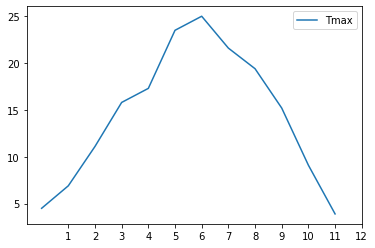

In [6]:
ax2010 = y2010.plot(y='Tmax', xticks=y2010['Month'])

let's do that again for 1960, 50 years earlier

In [7]:
y1960 = pd.read_sql('SELECT * FROM weather WHERE Year == 1960', conn)
y1960

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,36,1960,1,6.9,1.8,47.9,34.4
1,37,1960,2,7.9,1.6,48.0,80.1
2,38,1960,3,10.2,4.5,33.9,65.0
3,39,1960,4,14.3,4.6,12.4,156.1
4,40,1960,5,18.4,9.3,45.6,181.7
5,41,1960,6,22.1,12.1,42.8,248.6
6,42,1960,7,20.1,12.4,67.2,139.7
7,43,1960,8,20.3,11.8,60.8,150.9
8,44,1960,9,18.5,10.5,75.3,128.4
9,45,1960,10,14.2,8.2,155.5,75.2


and plot the Tmax for the two years

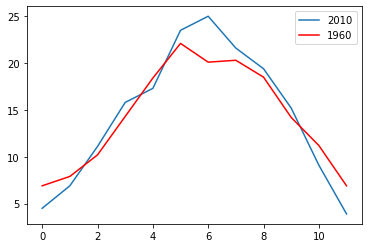

In [8]:
ax2010 = y2010.plot(y='Tmax')
ax = y1960.plot(y='Tmax',color = 'red', ax=ax2010)
ax.legend(['2010','1960'])

interesting, 2010 was both hotter an colder than 1960 it seems

Which were the hottest years

Here the WHERE clause is Tmax > 25, that is,let's select the rows where Tmax was more than 25 degrees

But also since we are only interested in the max temperature, let's ignore the columns that we are not intersted in

WHERE is not * = ALL now. we list the columns that we want returned

In [9]:
high = pd.read_sql('SELECT Year,Month,Tmax FROM weather WHERE Tmax > 25', conn)
high

,Year,Month,Tmax
0,1975,8,25.9
1,1976,6,25.5
2,1976,7,26.6
3,1976,8,25.1
4,1983,7,27.6
5,1989,7,25.8
6,1990,8,26.0
7,1994,7,26.2
8,1995,7,26.3
9,1995,8,27.0


that in order of the year
what would be more interesting would be to have it in order of temperature
we add the clause ORDER BY and give the column which should dictate the order. DESC means in descending order (omit that and you'll get the default, ascending order

In [10]:
high = pd.read_sql('SELECT Year,Month,Tmax FROM weather WHERE Tmax > 25 ORDER BY Tmax DESC', conn)
high

,Year,Month,Tmax
0,2018,7,28.3
1,2006,7,28.2
2,1983,7,27.6
3,1995,8,27.0
4,2013,7,27.0
5,1976,7,26.6
6,2003,8,26.4
7,1995,7,26.3
8,1994,7,26.2
9,1990,8,26.0


interesting, the hottest months are in the summer! who'd have thought it. but 

---

to be sure let's plot a histogram

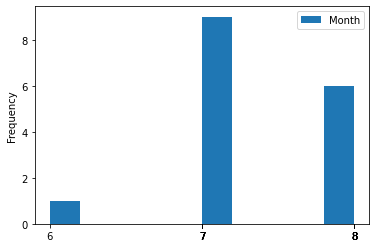

In [11]:
high.plot.hist(y='Month', xticks=high['Month']);

Yes, the hottest month tends to be July

So, why don't we take a look at the months of July throughout the decades and see how the temperature chnges

In [12]:
july = pd.read_sql('SELECT Year,Month,Tmax FROM weather WHERE month == 6', conn)
july

,Year,Month,Tmax
0,1957,6,23.6
1,1958,6,19.4
2,1959,6,22.1
3,1960,6,22.1
4,1961,6,21.7
...,...,...,...
57,2014,6,22.1
58,2015,6,22.2
59,2016,6,20.7
60,2017,6,24.0


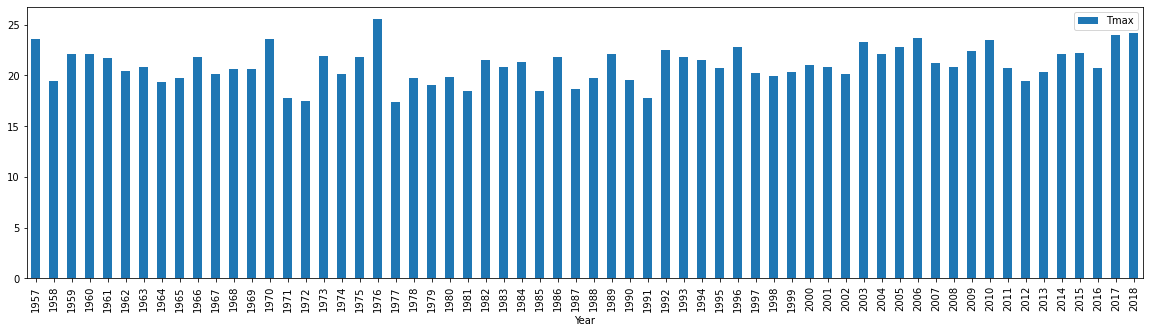

In [13]:
july.plot.bar(x='Year', y='Tmax', figsize=(20,5));

In [14]:
max = pd.read_sql('SELECT Year,Month,max(Tmax) FROM weather GROUP BY Year', conn)
max

,Year,Month,max(Tmax)
0,1957,6,23.6
1,1958,7,21.7
2,1959,7,24.7
3,1960,6,22.1
4,1961,7,22.1
...,...,...,...
58,2015,7,23.7
59,2016,8,24.7
60,2017,6,24.0
61,2018,7,28.3


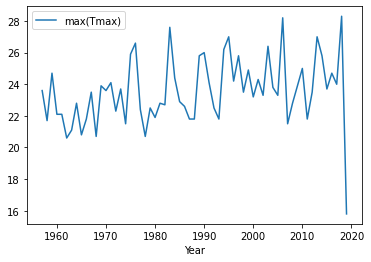

In [15]:
max.plot(x = 'Year', y='max(Tmax)')

    Year  Month  min(Tmin)
0   1957     12        1.0
1   1958      1        0.9
2   1959      1       -1.1
3   1960      2        1.6
4   1961     12        0.2
..   ...    ...        ...
58  2015      1        1.6
59  2016      2        2.9
60  2017      1        0.7
61  2018      2        0.6
62  2019      1        2.0

[63 rows x 3 columns]


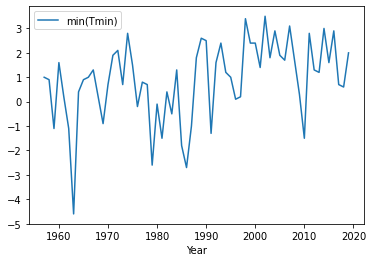

In [16]:
min = pd.read_sql('SELECT Year,Month,min(Tmin) FROM weather GROUP BY Year', conn)
print(min)
min.plot(x='Year', y=('min(Tmin)'))

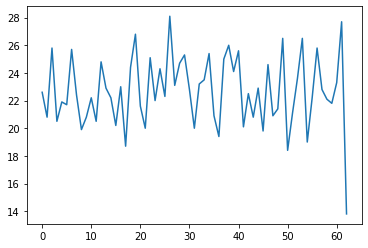

In [17]:
r = max['max(Tmax)'] - min['min(Tmin)']
r.plot()

In [18]:
m = pd.read_sql('SELECT Year,sum(Sun),sum(Rain),max(Tmax),min(Tmin) FROM weather GROUP BY Year', conn)
m

,Year,sum(Sun),sum(Rain),max(Tmax),min(Tmin)
0,1957,1453.1,557.6,23.6,1.0
1,1958,1278.6,739.7,21.7,0.9
2,1959,1786.4,487.3,24.7,-1.1
3,1960,1374.0,735.4,22.1,1.6
4,1961,1471.7,558.8,22.1,0.2
...,...,...,...,...,...
58,2015,1507.7,562.0,23.7,1.6
59,2016,1473.7,590.6,24.7,2.9
60,2017,1452.0,572.2,24.0,0.7
61,2018,1704.8,580.0,28.3,0.6


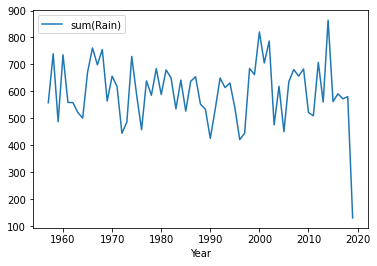

In [19]:
m.plot(x='Year', y='sum(Rain)')

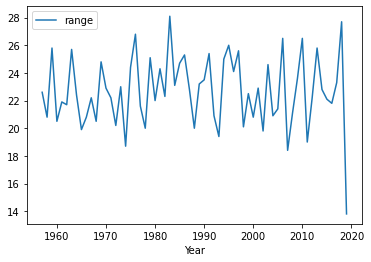

In [20]:
m['range']=m['max(Tmax)']-m['min(Tmin)']
m.plot(x='Year',y='range')